# Project: TMDb movie data analysis

### The TMDb movie data  set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### We want to know:
- in each year what are the most popular genres?
- what features are correlated with the budget?
- who are the top 10 profitable directors?
- what are the top 10 profitable movies?
- what are the top 10 popular movies of all time?

### Made the necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

### Read the data file `tmdb-movies.csv`

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Info about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Columns `id`, `imdb_id`, `homepage` is important only if we're doing web scraping, columns `tagline`, `keywords`, `overview` is importrant only if we're intersted in NLP modling, we also to made it fair for all movies so we'll only use `budget_adj`, `revenue_adj` to be able to ignore infilation, also column `release_date` is important only if we want to extract months, so we'll drop all these columns.

In [4]:
# Drop columns

df.drop(columns=['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], 
        inplace=True)
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


### What is the most profitable movie of all time without considering the budget?

In [5]:
# Select max of 'revenue_adj'

df[df.revenue_adj==df.revenue_adj.max()]

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09


### Make both `revenue_adj`, `budget_adj` to be measured in millions

In [6]:
# Divide 'revenue_adj' one million

df.revenue_adj /= 10**6

In [7]:
# Divide 'budget_adj' one million

df.budget_adj /= 10**6

### Add a new column `profit` to represent the net profit

In [8]:
df['profit'] = df.revenue_adj - df.budget_adj

### Summary statistics of numeric values

In [9]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,17.551040,51.364363,33.813323
std,1.000185,31.381405,575.619058,0.935142,12.812941,34.306156,144.632485,125.215073
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000,-413.912431
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000,0.000000
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000,0.000000
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,20.853251,33.697096,12.926173
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,425.000000,2827.123750,2750.136651


### Make a heat map to view the correlation between features

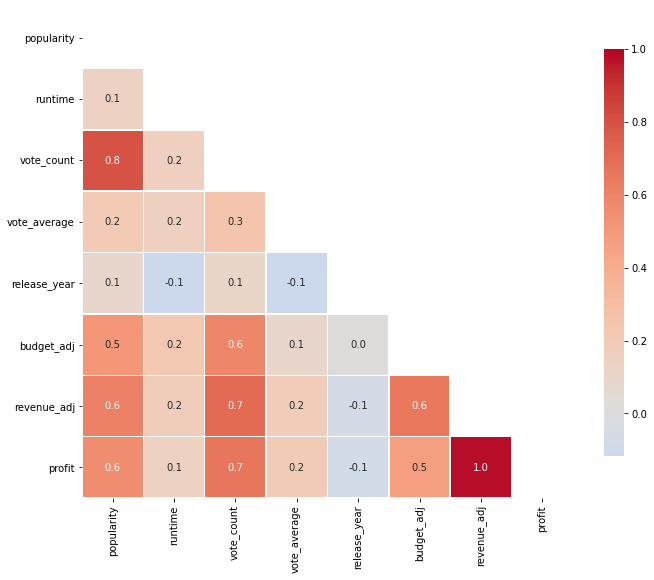

In [10]:
# plot heat map using seaborn with mask to show each correlation once (remove all values above the diagonal)

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 15))
sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    cmap='coolwarm'
)
plt.yticks(rotation=0);

### As shown above in the heat map, we see that both `popularity`, `vote_count` have a high correlation with `revenue_adj`, which means more people watch a movie leads to more profit (obviously), also `runtime`, `vote_average`, `release_year` do not correlate with `revenue_adj`, we also see that `budget_adj` has a high correlation with `revenue_adj`, which means the more you spend the more you get.

In [11]:
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,137.999939,1392.445893,1254.445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,137.999939,348.161292,210.161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,101.199955,271.619025,170.419070
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,183.999919,1902.723130,1718.723211
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,174.799923,1385.748801,1210.948878


### Each movie has a maximum of 5 genres

In [12]:
# Select genres where it have the longest values

df.genres[df.genres.str.len()==df.genres.str.len().max()]

1400    Action|Adventure|Animation|Science Fiction|Thr...
2523    Adventure|Fantasy|Animation|Science Fiction|My...
2960    Thriller|Animation|Action|Science Fiction|Adve...
Name: genres, dtype: object

In [13]:
print(df.genres[df.genres.str.len()==df.genres.str.len().max()].iloc[0])
print(df.genres[df.genres.str.len()==df.genres.str.len().max()].iloc[1])
print(df.genres[df.genres.str.len()==df.genres.str.len().max()].iloc[2])

Action|Adventure|Animation|Science Fiction|Thriller
Adventure|Fantasy|Animation|Science Fiction|Mystery
Thriller|Animation|Action|Science Fiction|Adventure


### We split the genres into 5 features

In [14]:
# split the genre column into 5 columns where each column represent only one genre

df[['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5']] = df.genres.str.split("|", expand=True)

In [15]:
# view the 5 new genres columns

df.iloc[:,-5:]

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


### Count each distinct genre in each year

In [16]:
# go through each year then count how much each genre was present

gens_cols = ['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5']
genres_dict = dict()
for year in sorted(df.release_year.unique().tolist()):
    genres_dict[str(year)] = df[df.release_year==year].iloc[:,-5:].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
    

In [17]:
# view the genres count for 2015 for an example

genres_dict['2015']

Drama              260.0
Thriller           171.0
Comedy             162.0
Horror             125.0
Action             107.0
Science Fiction     86.0
Adventure           69.0
Romance             57.0
Documentary         57.0
Crime               51.0
Family              44.0
Mystery             42.0
Animation           39.0
Music               33.0
Fantasy             33.0
TV Movie            20.0
History             15.0
War                  9.0
Western              6.0
dtype: float64

### in each year what are the most popular genres?

In [18]:
# print the top 3 genres popular along side the year

for i in genres_dict:
    print(i, ':',genres_dict[i].keys()[0], ',',genres_dict[i].keys()[1], end=', ')
    print(genres_dict[i].keys()[2])
    

1960 : Drama , Comedy, Action
1961 : Drama , Comedy, Action
1962 : Drama , Action, Thriller
1963 : Drama , Comedy, Thriller
1964 : Drama , Comedy, Crime
1965 : Drama , Thriller, Action
1966 : Comedy , Drama, Action
1967 : Comedy , Drama, Romance
1968 : Drama , Comedy, Action
1969 : Drama , Comedy, Action
1970 : Drama , Comedy, Action
1971 : Drama , Thriller, Action
1972 : Drama , Comedy, Thriller
1973 : Drama , Crime, Thriller
1974 : Drama , Thriller, Crime
1975 : Drama , Thriller, Comedy
1976 : Drama , Thriller, Action
1977 : Drama , Adventure, Action
1978 : Drama , Thriller, Horror
1979 : Drama , Comedy, Thriller
1980 : Drama , Action, Thriller
1981 : Drama , Thriller, Horror
1982 : Drama , Comedy, Horror
1983 : Drama , Comedy, Thriller
1984 : Drama , Comedy, Action
1985 : Comedy , Drama, Action
1986 : Drama , Comedy, Action
1987 : Comedy , Drama, Action
1988 : Comedy , Drama, Horror
1989 : Comedy , Drama, Action
1990 : Drama , Comedy, Thriller
1991 : Drama , Comedy, Action
1992 : Dr

### what are the top 10 profitable movies?

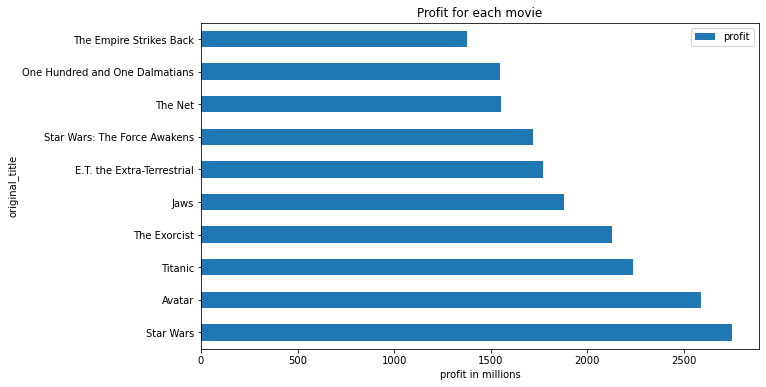

In [19]:
# sort the dataframe by 'profit' descendingly then select the top 10 values then plot it

df.sort_values(by='profit', ascending=False)[['original_title', 'profit']].iloc[0:10].\
plot(kind='barh', x='original_title', y='profit', rot=0, figsize=(10,6))
plt.xlabel('profit in millions')
plt.title('Profit for each movie');

### As shown in the bar chart, only `star wars` and `avatar` made over 2.5 billions profit, also  `titanic` and `the exorcist` made over 2 billions profit

### what are the top 10 worst profitable movies?

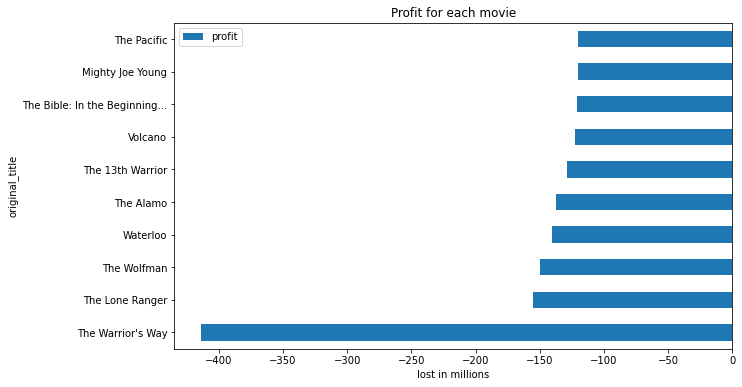

In [20]:
# sort the dataframe by 'profit' ascendingly then select the top 10 values then plot it

df.sort_values(by='profit', ascending=True)[['original_title', 'profit']].iloc[0:10].\
plot(kind='barh', x='original_title', y='profit', rot=0, figsize=(10,6))
plt.xlabel('lost in millions')
plt.title('Profit for each movie');

### We can see that `the warrior's way` has lost over 400 million dollar, the second is `the lone ranger` which lost over 150 million dollar

### what are the top 10 popular movies of all time?

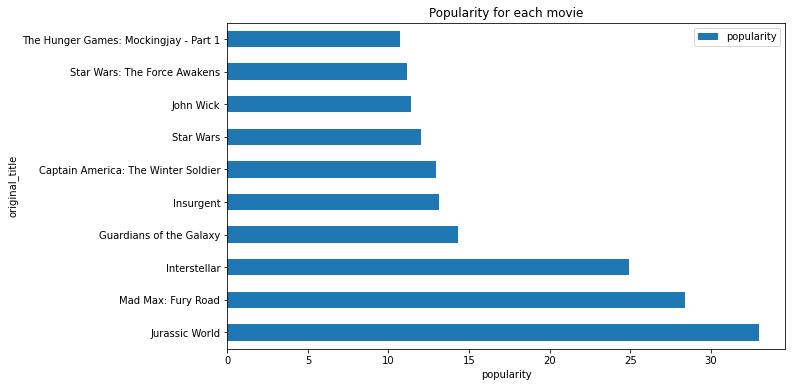

In [21]:
# sort the dataframe by 'popularity' ascendingly then select the top 10 values then plot it

df.sort_values(by='popularity', ascending=False)[['original_title', 'popularity']].iloc[0:10].\
plot(kind='barh', x='original_title', y='popularity', rot=0, figsize=(10,6))
plt.xlabel('popularity')
plt.title('Popularity for each movie');

### The most popular movie of all time is `jurassic world` then comes `mad max`

### what are the top 10 unpopular movies of all time?

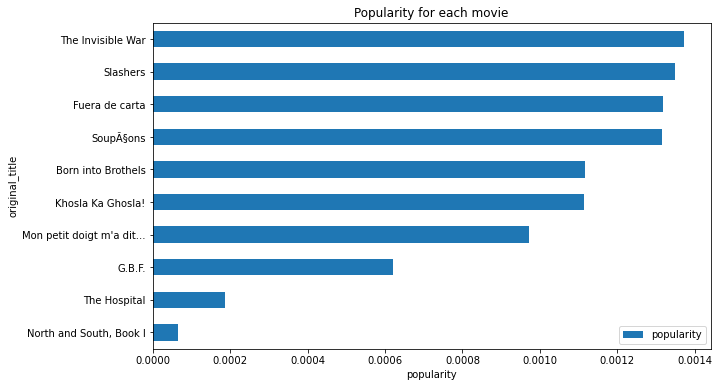

In [22]:
# sort the dataframe by 'popularity' descendingly then select the top 10 values then plot it

df.sort_values(by='popularity', ascending=True)[['original_title', 'popularity']].iloc[0:10].\
plot(kind='barh', x='original_title', y='popularity', rot=0, figsize=(10,6))
plt.xlabel('popularity')
plt.title('Popularity for each movie');

### And on the contrary we see that `north and south, book I` (never heard of it) is most unpopular movie, then comes `the hospital`

### Top 10 directors for the number of movies

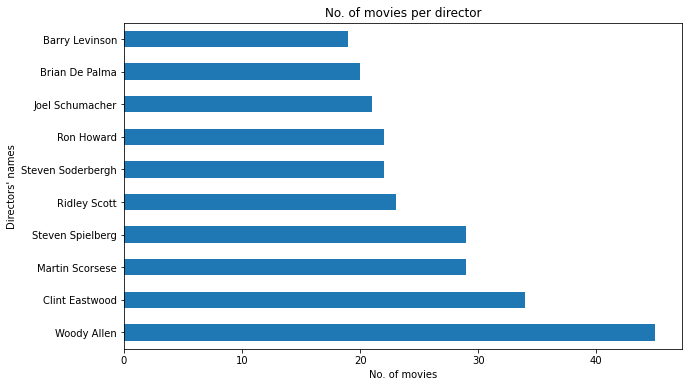

In [29]:
# count the number of movies for each director then plot the top 10

df.director.value_counts().iloc[0:10].plot(kind='barh', figsize=(10,6))
plt.xlabel('No. of movies')
plt.ylabel("Directors' names")
plt.title('No. of movies per director');

### We can also see that `Woody Allen` made over 45 movies!, while also `Clint Eastwood`, `Martin Scorsese` and `Steven Spielberg` made about 30 movies!

### Who are the top 10 profitable directors?

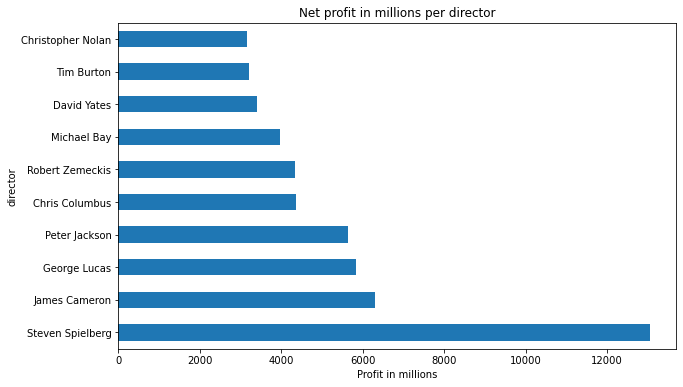

In [24]:
# groupby 'director' and 'profit' then sort the values by 'profit' descendingly then select the top 10 and plot it

df.groupby('director').profit.sum().sort_values(ascending=False).iloc[0:10].plot(kind='barh', figsize=(10,6))
plt.xlabel('Profit in millions')
plt.title('Net profit in millions per director');

### But when it comes to profit, we find that `Steven Spielberg` made a net profit over 12 billions!, then comes `James cameron` with net profit over 6 billions, it's of course becaue he made avatar which alone made a net profit of 2 billions, and also made titanic with net profit of also over 2 billions

### Who are the top 10 worst profitable directors?

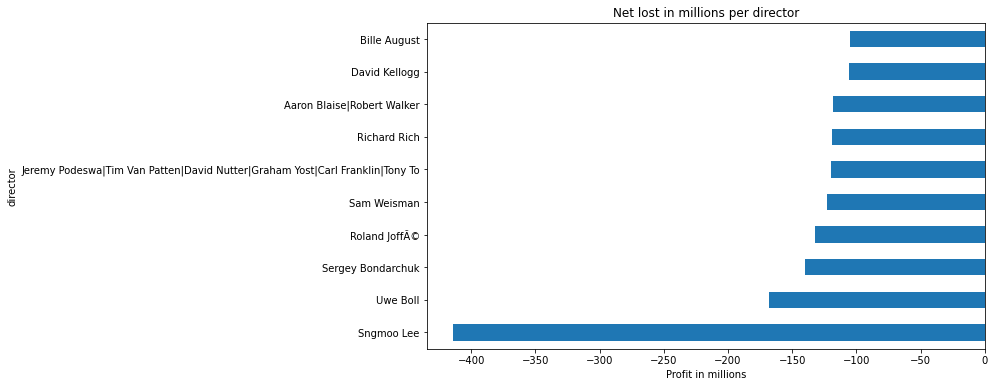

In [25]:
# groupby 'director' and 'profit' then sort the values by 'profit' ascendingly then select the top 10 and plot it

df.groupby('director').profit.sum().sort_values(ascending=True).iloc[0:10].plot(kind='barh', figsize=(10,6))
plt.xlabel('Profit in millions')
plt.title('Net lost in millions per director');

### We can see that the worst profitable director is `Sngmoo Lee` who made the worst movie `The Warrior's Way` with lost over 400 millions

### Most voted movies

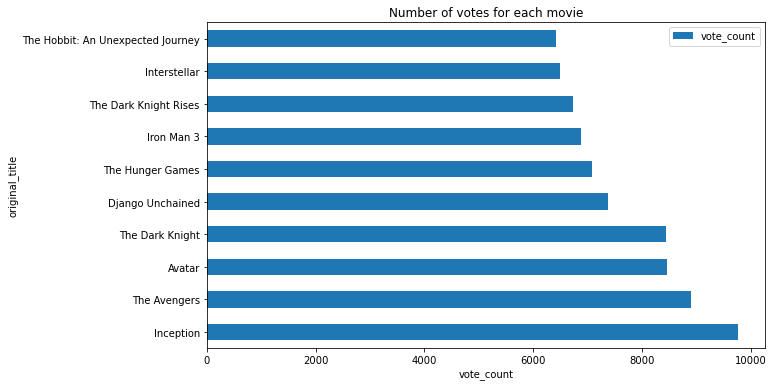

In [26]:
# sort the dataframe by 'vote_count' ascendingly then select the top 10 values then plot it

df.sort_values(by='vote_count', ascending=False)[['original_title', 'vote_count']].iloc[0:10].\
plot(kind='barh', x='original_title', y='vote_count', rot=0, figsize=(10,6))
plt.xlabel('vote_count')
plt.title('Number of votes for each movie');

### `Inception` the masterpiece by christopher nolan got the highest number of votes, comes next the superheros movie `The Avengers`

### Top rated movies

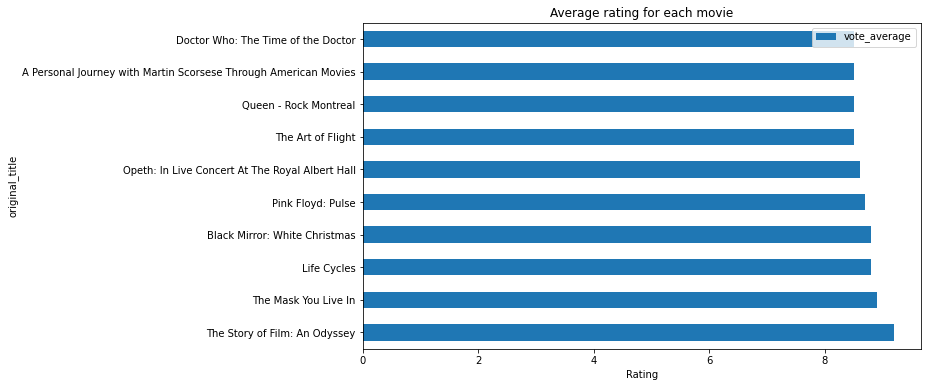

In [34]:
# sort the dataframe by 'vote_average' ascendingly then select the top 10 values then plot it

df.sort_values(by='vote_average', ascending=False)[['original_title', 'vote_average']].iloc[0:10].\
plot(kind='barh', x='original_title', y='vote_average', rot=0, figsize=(10,6))
plt.xlabel('Rating')
plt.title('Average rating for each movie');

### We now know that `The Story of Film: An Odyssey` is the only movie that got rating over 9!

### `The Shawshank Redemption` isn't the top rated movie! (this movie data need to be updated)

In [28]:
# view the rating The Shawshank Redemption movie, it's 8.4, but it's now 9.3

df.sort_values(by='vote_average', ascending=False)[['original_title', 'vote_average']].iloc[17]

original_title    The Shawshank Redemption
vote_average                           8.4
Name: 4178, dtype: object

### Conclusion: We can see that many factors affect movies, and we saw what factors that affect the movie profit, and what affect the acceptance of a movie by the audience, of course, these conclusions are limited due to lack of statistical tests, and also keep in mind that correlation does not imply causation.

### Limitations: although this data set contains approximately 10,000 samples, the number of movies is estimated to be 500,000 so this data set only contains 2% of all movies, and it's not sufficient to draw conclusions, also the combined genres’ records, director records, cast records requires special treatment to analyze them individually as they pose a structural issue.